In [48]:
!python.exe -m pip install --upgrade pip
!pip install tensorflow
!pip install scikit-learn
!pip install keras
!pip install seaborn
!pip install numpy
!pip install ann_visualizer

In [49]:
import os
ROOT_DIR = os.getcwd()
print("Current working directory:", ROOT_DIR)


Current working directory: c:\Users\vinit\Desktop\Neuromorphic_ASIC_Design


In [50]:
# import tensorflow as tf

# if tf.config.list_physical_devices('GPU'):
#     print("GPU is available!")
# else:
#     print("GPU is not available.")


In [51]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# from ann_visualizer.visualize import ann_viz

In [52]:
# import tensorflow as tf
# print("GPU Available:", tf.config.list_physical_devices('GPU'))
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [53]:
# def path_to_csv(file_number):
#     filenumber = str(file_number) + '.csv'
#     # for dirname, _, filenames in os.walk(''):
#     for filename in filenames:
#         if (filename == filenumber):
#             file_path = os.path.join(dirname, filename)
#             # print(os.path.join(dirname, file_number))
#             return file_path

In [54]:
path = 'database\\MIT-BIH Arrhythmia Database copy.csv'

In [55]:
file_path  = os.path.join(ROOT_DIR, path)

In [56]:
file_path

'c:\\Users\\vinit\\Desktop\\Neuromorphic_ASIC_Design\\database\\MIT-BIH Arrhythmia Database copy.csv'

In [57]:
# fix random seed for reproducibility
# np.random.seed(7)

In [58]:
# load MIT-BIH dataset
dataset = pd.read_csv(file_path)

In [59]:
dataset

record type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0          101    N        76      313.0  0.074347 -0.160548  1.036401   
1          101    N       313      315.0 -0.052079 -0.264784  0.886597   
2          101    N       315      321.0 -0.062151 -0.296983  0.991859   
3          101    N       321      336.0 -0.063322 -0.281386  1.034903   
4          101    N       336      344.0 -0.062915  1.046914  1.046408   
...        ...  ...       ...        ...       ...       ...       ...   
100684     234    N       240      241.0 -0.110230  1.420339  1.403346   
100685     234    N       241      243.0 -0.119014  1.424782  1.420328   
100686     234    N       243      252.0  0.173524 -0.443214  1.436878   
100687     234    N       252      244.0 -0.119820 -0.401522  1.337051   
100688     234    N       244      236.0  0.162909  1.416672  1.409440   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -0.285662 -0.026824              41  ...  0.025930               2   
1      -0.366298 -0.059710              21  ... -0.042009              26   
2      -0.410306 -0.065686              22  ...  0.009528               3   
3      -0.403880 -0.071750              22  ... -0.020536               6   
4       1.046408 -0.074639              11  ...  0.016053              16   
...          ...       ...             ...  ...       ...             ...   
100684  1.403346 -0.115682              14  ... -0.069234               5   
100685  1.420328 -0.134406              13  ... -0.069530               7   
100686 -0.714642 -0.136431              38  ... -0.089396               9   
100687 -0.688560 -0.125076              27  ... -0.065487               3   
100688  1.409440 -0.118397              28  ... -0.078260               5   

        1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                  18             22              2      0.025930   
1                  27             62              9     -0.042009   
2                   8             12              1      0.009528   
3                   9             16              1     -0.020536   
4                   5             31             10      0.016053   
...               ...            ...            ...           ...   
100684              6             20              9     -0.069234   
100685              5             20              8     -0.069530   
100686              7             24              8     -0.089396   
100687              1             12              8     -0.065487   
100688              8             21              8     -0.078260   

        1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0           0.025930      0.025930      0.025436      0.025436  
1          -0.029498      0.005012      0.030892      0.002986  
2           0.009528      0.008786      0.008786      0.008368  
3          -0.020257     -0.018965     -0.016968     -0.014555  
4           0.006742      0.002782     -0.007798     -0.051155  
...              ...           ...           ...           ...  
100684     -0.068378     -0.065373     -0.060779     -0.054383  
100685     -0.069290     -0.066317     -0.053437     -0.045120  
100686     -0.088155     -0.078611     -0.066763     -0.058650  
100687     -0.065487     -0.064941     -0.064941     -0.061120  
100688     -0.077918     -0.075665     -0.070433     -0.060190  

[100689 rows x 34 columns]

In [60]:
veb_rows = dataset[dataset['type'] == 'VEB'].copy()
sveb_rows = dataset[dataset['type'] == 'SVEB'].copy()
f_rows = dataset[dataset['type'] == 'F'].copy()
q_rows = dataset[dataset['type'] == 'Q'].copy()

# Append duplicated rows to the original DataFrame
dataset = pd.concat([dataset] + [veb_rows]*12 + [sveb_rows]*29 + [f_rows]*110 + [q_rows]*6200, ignore_index=True)

# Shuffle the DataFrame to mix the duplicated rows with the original ones
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [61]:
print(veb_rows)
print(sveb_rows)
print(f_rows)
print(q_rows)

        record type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
1966       106  VEB       200      178.0 -0.398770  0.357839  1.061631   
1967       106  VEB       178      431.0  0.769754  0.780058  0.942820   
1969       106  VEB       177      167.0  0.486703  0.387118  0.805491   
1970       106  VEB       167      485.0  0.766437  0.755489  0.775524   
1973       106  VEB       192      422.0  0.386697  0.385532  0.841966   
...        ...  ...       ...        ...       ...       ...       ...   
97930      233  VEB       142      271.0  0.783369  1.063247 -1.161516   
97934      233  VEB       147      281.0  0.712399  1.416801 -1.010546   
99517      234  VEB       165      305.0  0.229047 -0.594081  0.759360   
99917      234  VEB       165      322.0  0.191918 -0.514462  0.609758   
100547     234  VEB       167      313.0  0.084583  0.305422  0.804059   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
1966   -1.413266 -0.402472        

In [62]:
dataset

record  type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0          208   VEB       193      286.0  0.013977  0.576987  1.375172   
1          213     F       200      205.0 -0.226263  0.943676  2.122414   
2          230     N       302      324.0  0.134309 -0.369182  1.120163   
3          105     Q       228      223.0  0.205968 -0.169028  0.392919   
4          232  SVEB       269      726.0  0.033187  0.561327  0.541699   
...        ...   ...       ...        ...       ...       ...       ...   
446713     203     Q       214      292.0  2.150903  0.228101  0.223959   
446714     203   VEB       134      139.0  0.159173  0.590291 -0.571170   
446715     233   VEB       146      275.0  0.764753  1.242113 -1.071479   
446716     208     Q        45      217.0  0.791487  0.453917  0.769909   
446717     233   VEB        63      221.0  0.819772  1.287757 -1.185954   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -1.358751 -0.006783              65  ... -0.687584               3   
1      -1.915087 -0.229771              38  ... -2.699938               5   
2      -1.265537 -0.075869              52  ...  0.029642              49   
3      -0.275316  0.053411              18  ... -0.448342               4   
4       0.541699  0.012058              19  ... -0.014354              14   
...          ...       ...             ...  ...       ...             ...   
446713  0.223959 -0.788440             119  ... -0.383616               8   
446714 -0.945402 -0.571170               5  ... -0.048833              28   
446715 -1.740389 -1.071479               5  ... -0.388436               3   
446716 -1.272451  0.619698              32  ... -1.548658              11   
446717 -1.713837 -1.185954               4  ... -0.413024               1   

        1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                  18             53             32     -0.687584   
1                  14             38             19     -2.699938   
2                   6             67             12      0.029642   
3                  10             30             16     -0.448342   
4                   5             29             10     -0.014354   
...               ...            ...            ...           ...   
446713             12             37             17     -0.383616   
446714              5             63             30     -0.048833   
446715             14             34             17     -0.388436   
446716             18             31              2     -1.548658   
446717             12             30             17     -0.413024   

        1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0          -0.687584     -0.711776     -0.711776     -0.725567  
1          -2.673539     -2.607663     -2.513533     -2.401466  
2           0.056866      0.233310      0.372050      0.691821  
3          -0.448342     -0.501832     -0.547234     -0.577491  
4          -0.005730     -0.000212     -0.088958     -0.271348  
...              ...           ...           ...           ...  
446713     -0.436722     -0.524640     -0.557970     -0.603973  
446714      0.056186      0.410614      0.228569     -0.377170  
446715     -0.388436     -0.377804     -0.377804     -0.354141  
446716     -1.448839     -1.185659     -0.824227     -0.450750  
446717     -0.413024     -0.413024     -0.413024     -0.413024  

[446718 rows x 34 columns]

In [63]:
# split into input (X) and output (dataset) variables
# X = dataset.iloc[:,2:4,]
# X1 = dataset.iloc[:, 2:18]
X = pd.concat([
    dataset.iloc[:, 2:4],
    dataset.iloc[:, 9:13]
], axis=1)


Y = dataset[['type']]

In [64]:
X

0_pre-RR  0_post-RR  0_qrs_interval  0_pq_interval  0_qt_interval  \
0            193      286.0              65              6            146   
1            200      205.0              38              2            118   
2            302      324.0              52             25             86   
3            228      223.0              18              7             31   
4            269      726.0              19              7             27   
...          ...        ...             ...            ...            ...   
446713       214      292.0             119             89            211   
446714       134      139.0               5              9             33   
446715       146      275.0               5              9             48   
446716        45      217.0              32              6            110   
446717        63      221.0               4             10             44   

        0_st_interval  
0                  75  
1                  78  
2                   9  
3                   6  
4                   1  
...               ...  
446713              3  
446714             19  
446715             34  
446716             72  
446717             30  

[446718 rows x 6 columns]

In [65]:
# # # normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
X_train_scaled = scaler.fit_transform(X)

# dataset_normalized = pd.read_csv(scaler.fit_transform(path), columns=path.columns)
X_train_scaled

array([[ 8.65430338, 13.28273245, 38.23529412,  3.3557047 , 42.85714286,
        52.85714286],
       [ 8.9871612 ,  9.4402277 , 22.35294118,  0.67114094, 34.34650456,
        55.        ],
       [13.83737518, 15.08538899, 30.58823529, 16.10738255, 24.62006079,
         5.71428571],
       ...,
       [ 6.41940086, 12.76091082,  2.94117647,  5.36912752, 13.06990881,
        23.57142857],
       [ 1.61673799, 10.00948767, 18.82352941,  3.3557047 , 31.91489362,
        50.71428571],
       [ 2.47265811, 10.19924099,  2.35294118,  6.04026846, 11.85410334,
        20.71428571]])

In [66]:
#Class Renaming
Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)

C:\Users\vinit\AppData\Local\Temp\ipykernel_24496\1281512207.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)
C:\Users\vinit\AppData\Local\Temp\ipykernel_24496\1281512207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)


In [67]:
Y

type
0          1
1          3
2          0
3          4
4          2
...      ...
446713     4
446714     1
446715     1
446716     4
446717     1

[446718 rows x 1 columns]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled , Y, test_size=0.2, random_state=42)

In [69]:
X_train

array([[ 3.94674275, 11.76470588,  2.94117647,  4.02684564, 12.46200608,
        23.57142857],
       [ 9.41512126,  7.96963947, 16.47058824,  8.05369128, 11.24620061,
         0.        ],
       [ 8.89205896,  6.68880455, 23.52941176, 10.73825503, 18.54103343,
         5.71428571],
       ...,
       [ 3.18592487,  1.37571157,  3.52941176,  3.3557047 ,  5.77507599,
         7.85714286],
       [ 8.93961008,  8.91840607, 21.17647059,  0.        , 32.52279635,
        52.85714286],
       [ 7.56062767, 13.42504744, 32.35294118,  4.69798658, 35.56231003,
        41.42857143]])

In [70]:
y_train

type
30237      1
197358     3
70421      3
102152     3
234879     0
...      ...
259178     4
365838     3
131932     4
146867     3
121958     4

[357374 rows x 1 columns]

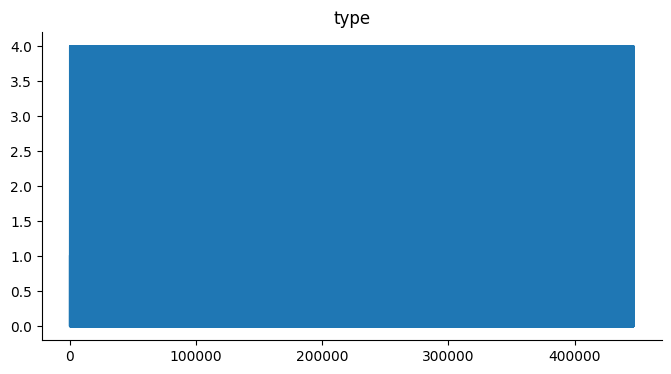

In [71]:
from matplotlib import pyplot as plt
Y['type'].plot(kind='line', figsize=(8, 4), title='type')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

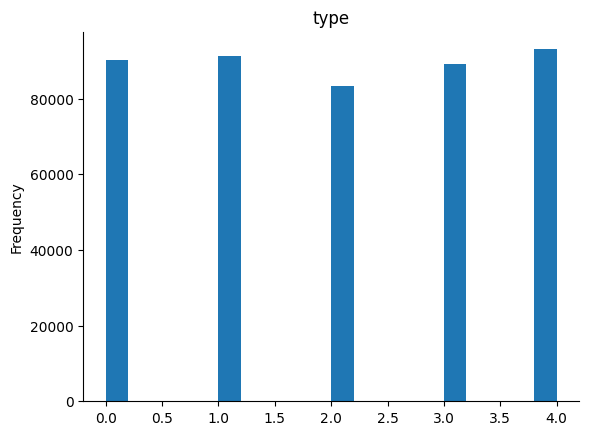

In [72]:
from matplotlib import pyplot as plt
Y['type'].plot(kind='hist', bins=20, title='type')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [73]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [74]:
import keras
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta = 0.0001, 
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [75]:
# # Compile model
# from keras.optimizers import Adamax 
# # my_optimizer = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[ 'accuracy'])

# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=32,
                    validation_data=(X_val, y_val), 
                    callbacks=[callback])
# evaluate the model


Epoch 1/5
11168/11168 [==============================] - 54s 5ms/step - loss: 0.4003 - accuracy: 0.8572 - val_loss: 0.2478 - val_accuracy: 0.9140
Epoch 2/5
11168/11168 [==============================] - 50s 4ms/step - loss: 0.2318 - accuracy: 0.9184 - val_loss: 0.2048 - val_accuracy: 0.9303
Epoch 3/5
11168/11168 [==============================] - 55s 5ms/step - loss: 0.1929 - accuracy: 0.9323 - val_loss: 0.1914 - val_accuracy: 0.9344
Epoch 4/5
11168/11168 [==============================] - 55s 5ms/step - loss: 0.1709 - accuracy: 0.9398 - val_loss: 0.1542 - val_accuracy: 0.9469
Epoch 5/5
11168/11168 [==============================] - 56s 5ms/step - loss: 0.1552 - accuracy: 0.9452 - val_loss: 0.1674 - val_accuracy: 0.9407


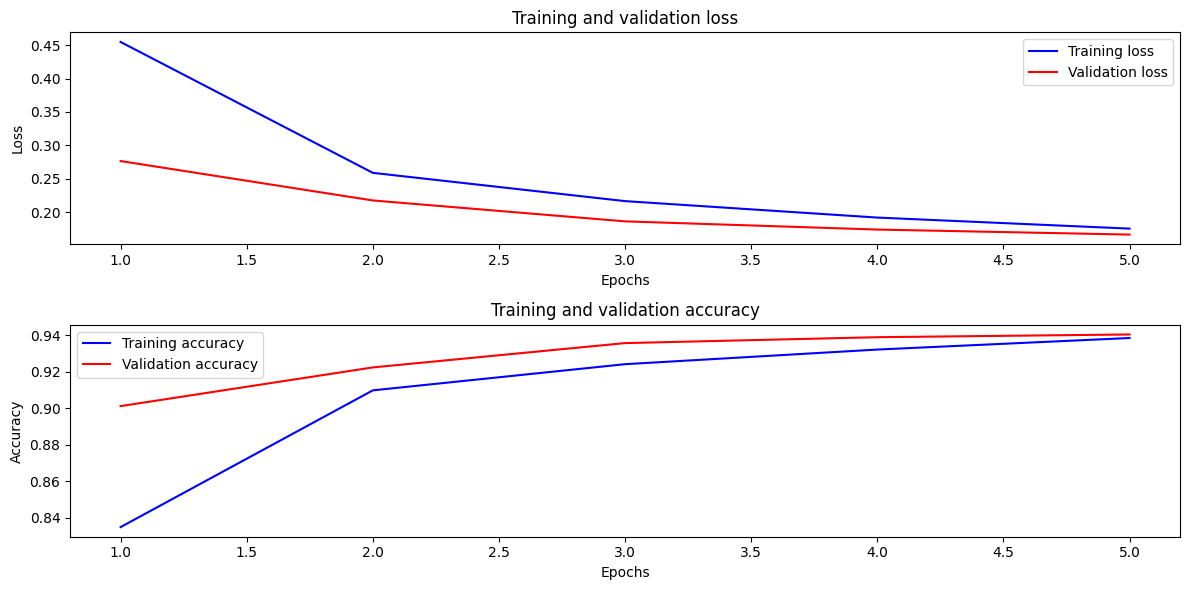

In [37]:
# Extract metrics from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# sensitivity = history.history['sensitivity']
# specificity = history.history['specificity']
# val_sensitivity = history.history['val_sensitivity']
# val_specificity = history.history['val_specificity']

# Plot the metrics
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plt.subplot(2, 2, 3)
# plt.plot(epochs, sensitivity, 'b', label='Training sensitivity')
# plt.plot(epochs, val_sensitivity, 'r', label='Validation sensitivity')
# plt.title('Training and validation sensitivity')
# plt.xlabel('Epochs')
# plt.ylabel('Sensitivity')
# plt.legend()

# plt.subplot(2, 2, 4)
# plt.plot(epochs, specificity, 'b', label='Training specificity')
# plt.plot(epochs, val_specificity, 'r', label='Validation specificity')
# plt.title('Training and validation specificity')
# plt.xlabel('Epochs')
# plt.ylabel('Specificity')
# plt.legend()

plt.tight_layout()
plt.show()

In [38]:
model

In [39]:
history

In [40]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


11168/11168 [==============================] - 20s 2ms/step - loss: 0.1609 - accuracy: 0.9426

accuracy: 94.26%


In [41]:
scores

[0.16087710857391357, 0.9426203370094299]

In [35]:
# Save model
# model.save('model1_ECG.h5')

file_path = os.path.join(ROOT_DIR, '%.4f_model14_ECG_6_50_50_50_5.h5' %(scores[1]))
print(file_path)
model.save(file_path)

c:\Users\vinit\Desktop\Neuromorphic_ASIC_Design\0.9731_model14_ECG_6_50_50_50_5.h5


c:\Users\vinit\Desktop\Neuromorphic_ASIC_Design\env1\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
# from google.colab import files

# # Download the file
# files.download('model1_ECG.h5')

In [ ]:
# Visualization
# from keras.layers import Dense
# from ann_visualizer.visualize import ann_viz

# ann_viz(model, view = True, title="My graph")


In [42]:
path = os.path.join(ROOT_DIR, 'database\\MIT-BIH Arrhythmia Database copy.csv') #database/INCART 2-lead Arrhythmia Database.csvdatabase/MIT-BIH Supraventricular Arrhythmia Database.csv

In [4]:
import numpy as np
import os
from keras.models import load_model
import pandas as pd
from sklearn import metrics

ROOT_DIR = os.getcwd()
path = os.path.join(ROOT_DIR, 'database\\MIT-BIH Arrhythmia Database.csv') #database/INCART 2-lead Arrhythmia Database.csv   
# database/MIT-BIH Supraventricular Arrhythmia Database.csv
# database\\MIT-BIH Supraventricular Arrhythmia Database.csv

# Load the trained model
# file_path = os.path.join(ROOT_DIR, '0.86_model5_ECG_6_20_20_5.h5')
file_path = os.path.join(ROOT_DIR, '0.9731_model14_ECG_6_150_150_150_5.h5')

# with keras.utils.custom_object_scope({'sensitivity': sensitivity, 'specificity': specificity}):
model = load_model(file_path)

start_i = np.random.randint(0,100688)
nos = np.random.randint(0,100)

df = pd.read_csv(path)
X_new = pd.concat([
    df.iloc[: , 2:4],
    df.iloc[: , 9:13]
    # df.iloc[start_i:start_i + nos, 2:4],
    # df.iloc[start_i:start_i + nos, 9:13]
], axis=1)

Y_new = df[['type']]
print (type(X_new))
print (type(Y_new))

# Get a section of the data from DataFrame Y
y_actual = Y_new[:]
# y_actual = Y_new[start_i:start_i + nos]

print("Checking the range from %d to %d for %d number of samples" %(start_i, start_i + nos - 1, nos))
print(X_new)
# print(y_actual)


# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
X_test_scaled = scaler.fit_transform(X_new)


# Make predictions
y_pred = model.predict(X_test_scaled)
# Print or use the predictions
print(y_pred)


predicted_class = np.argmax(y_pred, axis=1)
print(predicted_class)
print("The predicted class are :")

class_mapping = {0: 'N', 1: 'VEB', 2: 'SVEB', 3: 'F', 4: 'Q'}

# Replace the predicted integer classes with their string values
predicted_classes = [class_mapping[pred] for pred in predicted_class]

# Print the predicted classes vertically
# for pred in predicted_classes:
#     print(pred)

# y_actual_disp = Y_new['type'].iloc[start_i:start_i + nos].tolist()
y_actual_disp = Y_new['type'].iloc[:].tolist()
print("Predictions : Actual class")

for pred, actual in zip(predicted_classes, y_actual_disp):
    print(pred.center(len("Predctions")+1), ":", actual.center(len("Actual class")+1))
# print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

# print("*** Confusion Matrix ***")
# print(metrics.confusion_matrix(y_val, y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Checking the range from 19553 to 19620 for 68 number of samples
        0_pre-RR  0_post-RR  0_qrs_interval  0_pq_interval  0_qt_interval  \
0             76      313.0              41             18             66   
1            313      315.0              21              4             33   
2            315      321.0              22              3             32   
3            321      336.0              22              4             33   
4            336      344.0              11              4             16   
...          ...        ...             ...            ...            ...   
100684       240      241.0              14              3             18   
100685       241      243.0              13              5             19   
100686       243      252.0              38             21             67   
100687       252      244.0              27              5             40   
100688       

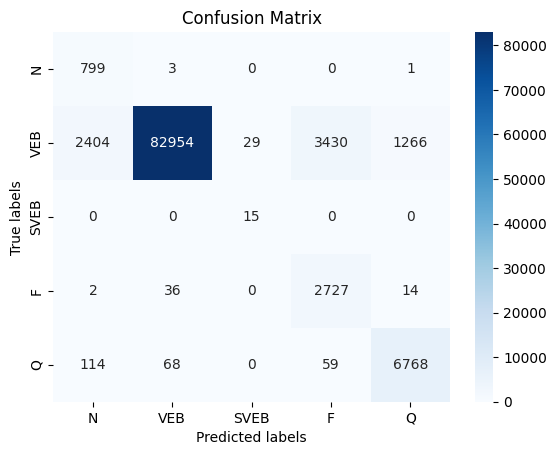

In [5]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

y_true = y_actual  # True labels for the test data
y_pred = predicted_classes  # Predicted labels by the model

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

class_labels = ['N', 'VEB', 'SVEB', 'F', 'Q']

# Visualize confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix

y_true = y_actual  # True labels for the test data
y_pred = predicted_classes  # Predicted labels by the model

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix

for row in conf_matrix:
    print(' '.join([str(item).center(10) for item in row]))


   799         3          0          0          1     
   2404      82954        29        3430       1266   
    0          0          15         0          0     
    2          36         0         2727        14    
   114         68         0          59        6768   


In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have true labels y_true and predicted labels y_pred
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract the number of classes
num_classes = len(conf_matrix)

# Initialize empty arrays to store TP, TN, FP, FN for each class
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

# Calculate TP, TN, FP, FN for each class
for i in range(num_classes):
    TP[i] = conf_matrix[i, i]
    FP[i] = np.sum(conf_matrix[:, i]) - TP[i]
    FN[i] = np.sum(conf_matrix[i, :]) - TP[i]
    TN[i] = np.sum(conf_matrix) - (TP[i] + FP[i] + FN[i])

# Calculate sensitivity (true positive rate) for each class
sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the metrics for each class
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"  Sensitivity: {sensitivity[i]}")
    print(f"  Specificity: {specificity[i]}")
    print(f"  Accuracy: {accuracy[i]}")

Class 0:
  Sensitivity: 0.9950186799501868
  Specificity: 0.9747712392127025
  Accuracy: 0.9749327136032735
Class 1:
  Sensitivity: 0.920861871829313
  Specificity: 0.9899113709221196
  Accuracy: 0.9281351488245985
Class 2:
  Sensitivity: 1.0
  Specificity: 0.9997119415141943
  Accuracy: 0.9997119844272959
Class 3:
  Sensitivity: 0.981288233177402
  Specificity: 0.9643652333775916
  Accuracy: 0.9648323054156859
Class 4:
  Sensitivity: 0.9656156370380938
  Specificity: 0.9863257899231426
  Accuracy: 0.9848841482187727


In [46]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels y_true and predicted labels y_pred
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract values from confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate sensitivity (true positive rate)
sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)




Sensitivity: 0.9968827289481437
Specificity: 0.0223463687150838
Accuracy: 0.9956890652798687


In [5]:
import sys
output_file = "output.txt"
with open(output_file, "w") as f:
    # Redirect standard output to the file
    sys.stdout = f
    
    print("Checking the range from %d to %d for %d number of samples" % (start_i, start_i + nos - 1, nos))
    # print(X_new)
    # print(y_pred)
    print(predicted_class)
    print("The predicted class are :")
    for pred, actual in zip(predicted_classes, y_actual_disp):
        print(pred.center(len("Predctions") + 1), ":", actual.center(len("Actual class") + 1))
    print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

In [42]:

from sklearn.metrics import confusion_matrix

# Assuming you have true labels y_true and predicted labels y_pred
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract values from confusion matrix
num_classes = len(conf_matrix)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate sensitivity (true positive rate) for each class
sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Sensitivity (TPR) for each class:", sensitivity)
print("Specificity (TNR) for each class:", specificity)
print("Accuracy for each class:", accuracy)

Sensitivity (TPR) for each class: [0.98505604 0.92012921 1.         0.95933789 0.96290484]
Specificity (TNR) for each class: [0.97951665 0.9869885  0.99978147 0.96193443 0.98241887]
Accuracy for each class: [0.97956083 0.92717179 0.99978151 0.96186277 0.98106049]


# -------------------------------------------------------------------------------------------------

In [43]:
random_number = np.random.randint(0,100688)
print(random_number)
random_number

5991


5991

In [44]:
from keras.callbacks import Callback
import numpy as np

class CustomEarlyStopping(Callback):
    def __init__(self, threshold=0.001, max_epochs=500):
        super(CustomEarlyStopping, self).__init__()
        self.threshold = threshold
        self.max_epochs = max_epochs
        self.best_loss = float('inf')
        self.epoch_count = 0

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_count += 1
        current_loss = logs.get('loss')
        # if current_loss < self.best_loss:
        #     self.best_loss = current_loss
        
        # Check if the sum of square errors is less than the threshold
        if current_loss < self.threshold or self.epoch_count >= self.max_epochs:
            self.model.stop_training = True
            print(f"\nTraining stopped at epoch {epoch+1} with loss: {self.best_loss}")


In [45]:
# from pickle import NONE
# import matplotlib.pyplot as plt
# from keras.callbacks import Callback

# class MetricsCallback(Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = []
#         # self.sensitivities = []
#         # self.specificities = []
#         self.accuracies = []
#         self.val_losses = []
#         # self.val_sensitivities = []
#         # self.val_specificities = []
#         self.val_accuracies = []

#     def on_epoch_end(self, epoch, logs={}):
#         self.losses.append(logs.get('loss'))
#         # self.sensitivities.append(logs.get('sensitivity'))
#         # self.specificities.append(logs.get('specificity'))
#         self.accuracies.append(logs.get('accuracy'))
#         self.val_losses.append(logs.get('val_loss'))
#         # self.val_sensitivities.append(logs.get('val_sensitivity'))
#         # self.val_specificities.append(logs.get('val_specificity'))
#         self.val_accuracies.append(logs.get('val_accuracy'))

    # def on_tarin_end(self, logs={}):
    #     # Plot metrics
    #     plt.figure(figsize=(6, 6))
    #     plt.subplot(2, 2, 1)
    #     plt.plot(self.losses, label='loss')
    #     plt.plot(self.val_losses, label='val_loss')
    #     plt.xlabel('Epoch')
    #     plt.ylabel('Loss')
    #     plt.legend()
    #     # plt.ylim(0, 1)

    #     plt.subplot(2, 2, 2)
    #     plt.plot(self.sensitivities, label='sensitivity')
    #     plt.plot(self.val_sensitivities, label='val_sensitivity')
    #     plt.xlabel('Epoch')
    #     plt.ylabel('Sensitivity')
    #     plt.legend()
    #     # plt.ylim(0, 1)

    #     plt.subplot(2, 2, 3)
    #     plt.plot(self.specificities, label='specificity')
    #     plt.plot(self.val_specificities, label='val_specificity')
    #     plt.xlabel('Epoch')
    #     plt.ylabel('Specificity')
    #     plt.legend()
    #     # plt.ylim(0, 1)

    #     plt.subplot(2, 2, 4)
    #     plt.plot(self.accuracies, label='accuracy')
    #     plt.plot(self.val_accuracies, label='val_accuracy')
    #     plt.xlabel('Epoch')
    #     plt.ylabel('Accuracy')
    #     plt.legend()
    #     # plt.ylim(0, 1)

    #     plt.tight_layout()
    #     plt.show()

In [46]:
import keras.backend as K

def sensitivity(y_true, y_pred):

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

    # true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    # # possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    # possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    # return true_positives / (possible_negatives + true_positives)

def specificity(y_true, y_pred):

    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

    # true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    # possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    # # possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    # return true_negatives / (possible_positives + true_negatives)


In [47]:
# from sklearn import preprocessing
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train)
# X_test_scaled = min_max_scaler.transform(X_test)

# print(scaler.scale_)

# X_train_scaled